# Syria Telcom

Business Problem:

Syria Telcom is losing customers.  It is important to develop a model that can accurately predict those customers who are most likely to 'churn'.  Churn is an industry term used for customers leaving or unsubscribing to a service.  In order to prevent churn or turnover. We must find a model that can identify these customers.

In this case we are most concerned with False Negatives.  Recall will be a very important metric.  Recall will tell us what percentage of the customers that have churned we can properly identify.  Keeping False negatives low becomes more important than keeping false positives low because it is much worse to miss identify someone that could leave than to miss label a customer that isn't going to leave.  

## Importing Libraries
Potential libraries/tools that will be needed to complete this task

In [1]:
#Usual Suspects
import pandas as pd
import numpy as np
import math
from IPython import display # display saved images
import warnings

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#SKLEARN
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, \
precision_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer


#IBLearn
from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.over_sampling import SMOTE


## Obtain the Data
The data for this project is in a .csv file saved as 'telcom.csv'

It is imported below and the first five rows are being displayed.

In [2]:
##import data 
df = pd.read_csv('data/telcom.csv')
##display head
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

## Inspect / Clean Data
Below we will get an idea of what the dataset looks like and decide if there is any necessary cleaning that is needed.

In [3]:
#Get column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
#Getting Differential Statistics
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

## Train Test Split

Data is being split into training and testing sets. This keeps our validation data separate to prevent data leakage.
Data leakage will corrupt the integrity of our model by allowing data that is supposed to be unknown into the training of our model.


* Target variable (y): 'churn'
* Features(X) - all other columns

In [5]:
#train_test_split drop churn
#also drop phone 
X = df.drop(columns=['phone number','churn'],axis=1)
y = df['churn'].astype(int)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
X_train.head()

state  account length  area code international plan voice mail plan  \
817     UT             243        510                 no              no   
1373    SC             108        415                 no              no   
679     TX              75        415                yes              no   
56      CO             141        415                 no              no   
1993    IN              86        510                 no              no   

      number vmail messages  total day minutes  total day calls  \
817                       0               95.5               92   
1373                      0              112.0              105   
679                       0              222.4               78   
56                        0              126.9               98   
1993                      0              216.3               96   

      total day charge  total eve minutes  total eve calls  total eve charge  \
817              16.24              163.7               63             13.91   
1373             19.04              193.7              110             16.46   
679              37.81              327.0              111             27.80   
56               21.57              180.0               62             15.30   
1993             36.77              266.3               77             22.64   

      total night minutes  total night calls  total night charge  \
817                 264.2                118               11.89   
1373                208.9                 93                9.40   
679                 208.0                104                9.36   
56                  140.8                128                6.34   
1993                214.0                110                9.63   

      total intl minutes  total intl calls  total intl charge  \
817                  6.6                 6               1.78   
1373                 4.1                 4               1.11   
679                  8.7                 9               2.35   
56                   8.0                 2               2.16   
1993                 4.5                 3               1.22   

      customer service calls  
817                        2  
1373                       4  
679                        1  
56                         1  
1993                       0

In [7]:
X_train.shape

(2666, 19)

## Inspect the Target
This is used to see what are target data looks like.  
Getting the value counts and their percentages will help us make decisions moving forward.
This is a binary classification which most likely will have a small minority sample.  

In [8]:
no_ch, churn = y.value_counts()
no_per, c_per = y.value_counts(normalize=True)
print('No Churn: {} \t{}\nChurn: {}\t{}'.format(no_ch,no_per,churn,c_per))

No Churn: 2850 	0.8550855085508551
Churn: 483	0.14491449144914492


Target is definitely imbalanced will need to use SMOTE later....

# Inspect X_train
X_train.head()
do a pairplot to help with feature selection

In [9]:
X_train.head()

state  account length  area code international plan voice mail plan  \
817     UT             243        510                 no              no   
1373    SC             108        415                 no              no   
679     TX              75        415                yes              no   
56      CO             141        415                 no              no   
1993    IN              86        510                 no              no   

      number vmail messages  total day minutes  total day calls  \
817                       0               95.5               92   
1373                      0              112.0              105   
679                       0              222.4               78   
56                        0              126.9               98   
1993                      0              216.3               96   

      total day charge  total eve minutes  total eve calls  total eve charge  \
817              16.24              163.7               63             13.91   
1373             19.04              193.7              110             16.46   
679              37.81              327.0              111             27.80   
56               21.57              180.0               62             15.30   
1993             36.77              266.3               77             22.64   

      total night minutes  total night calls  total night charge  \
817                 264.2                118               11.89   
1373                208.9                 93                9.40   
679                 208.0                104                9.36   
56                  140.8                128                6.34   
1993                214.0                110                9.63   

      total intl minutes  total intl calls  total intl charge  \
817                  6.6                 6               1.78   
1373                 4.1                 4               1.11   
679                  8.7                 9               2.35   
56                   8.0                 2               2.16   
1993                 4.5                 3               1.22   

      customer service calls  
817                        2  
1373                       4  
679                        1  
56                         1  
1993                       0

## Pairplot the Features
This will help us visualize the relationships between our features.  It will help with Feature selection.  At this point it is going to look like a big mess, but there are a few things that we will be able to identify.  

* Categorical Variables:  These will look like straight lines. 
* Correlated Variabels: If there is a perfect linear relationship(diagnol line) then the variables are telling us the same thing




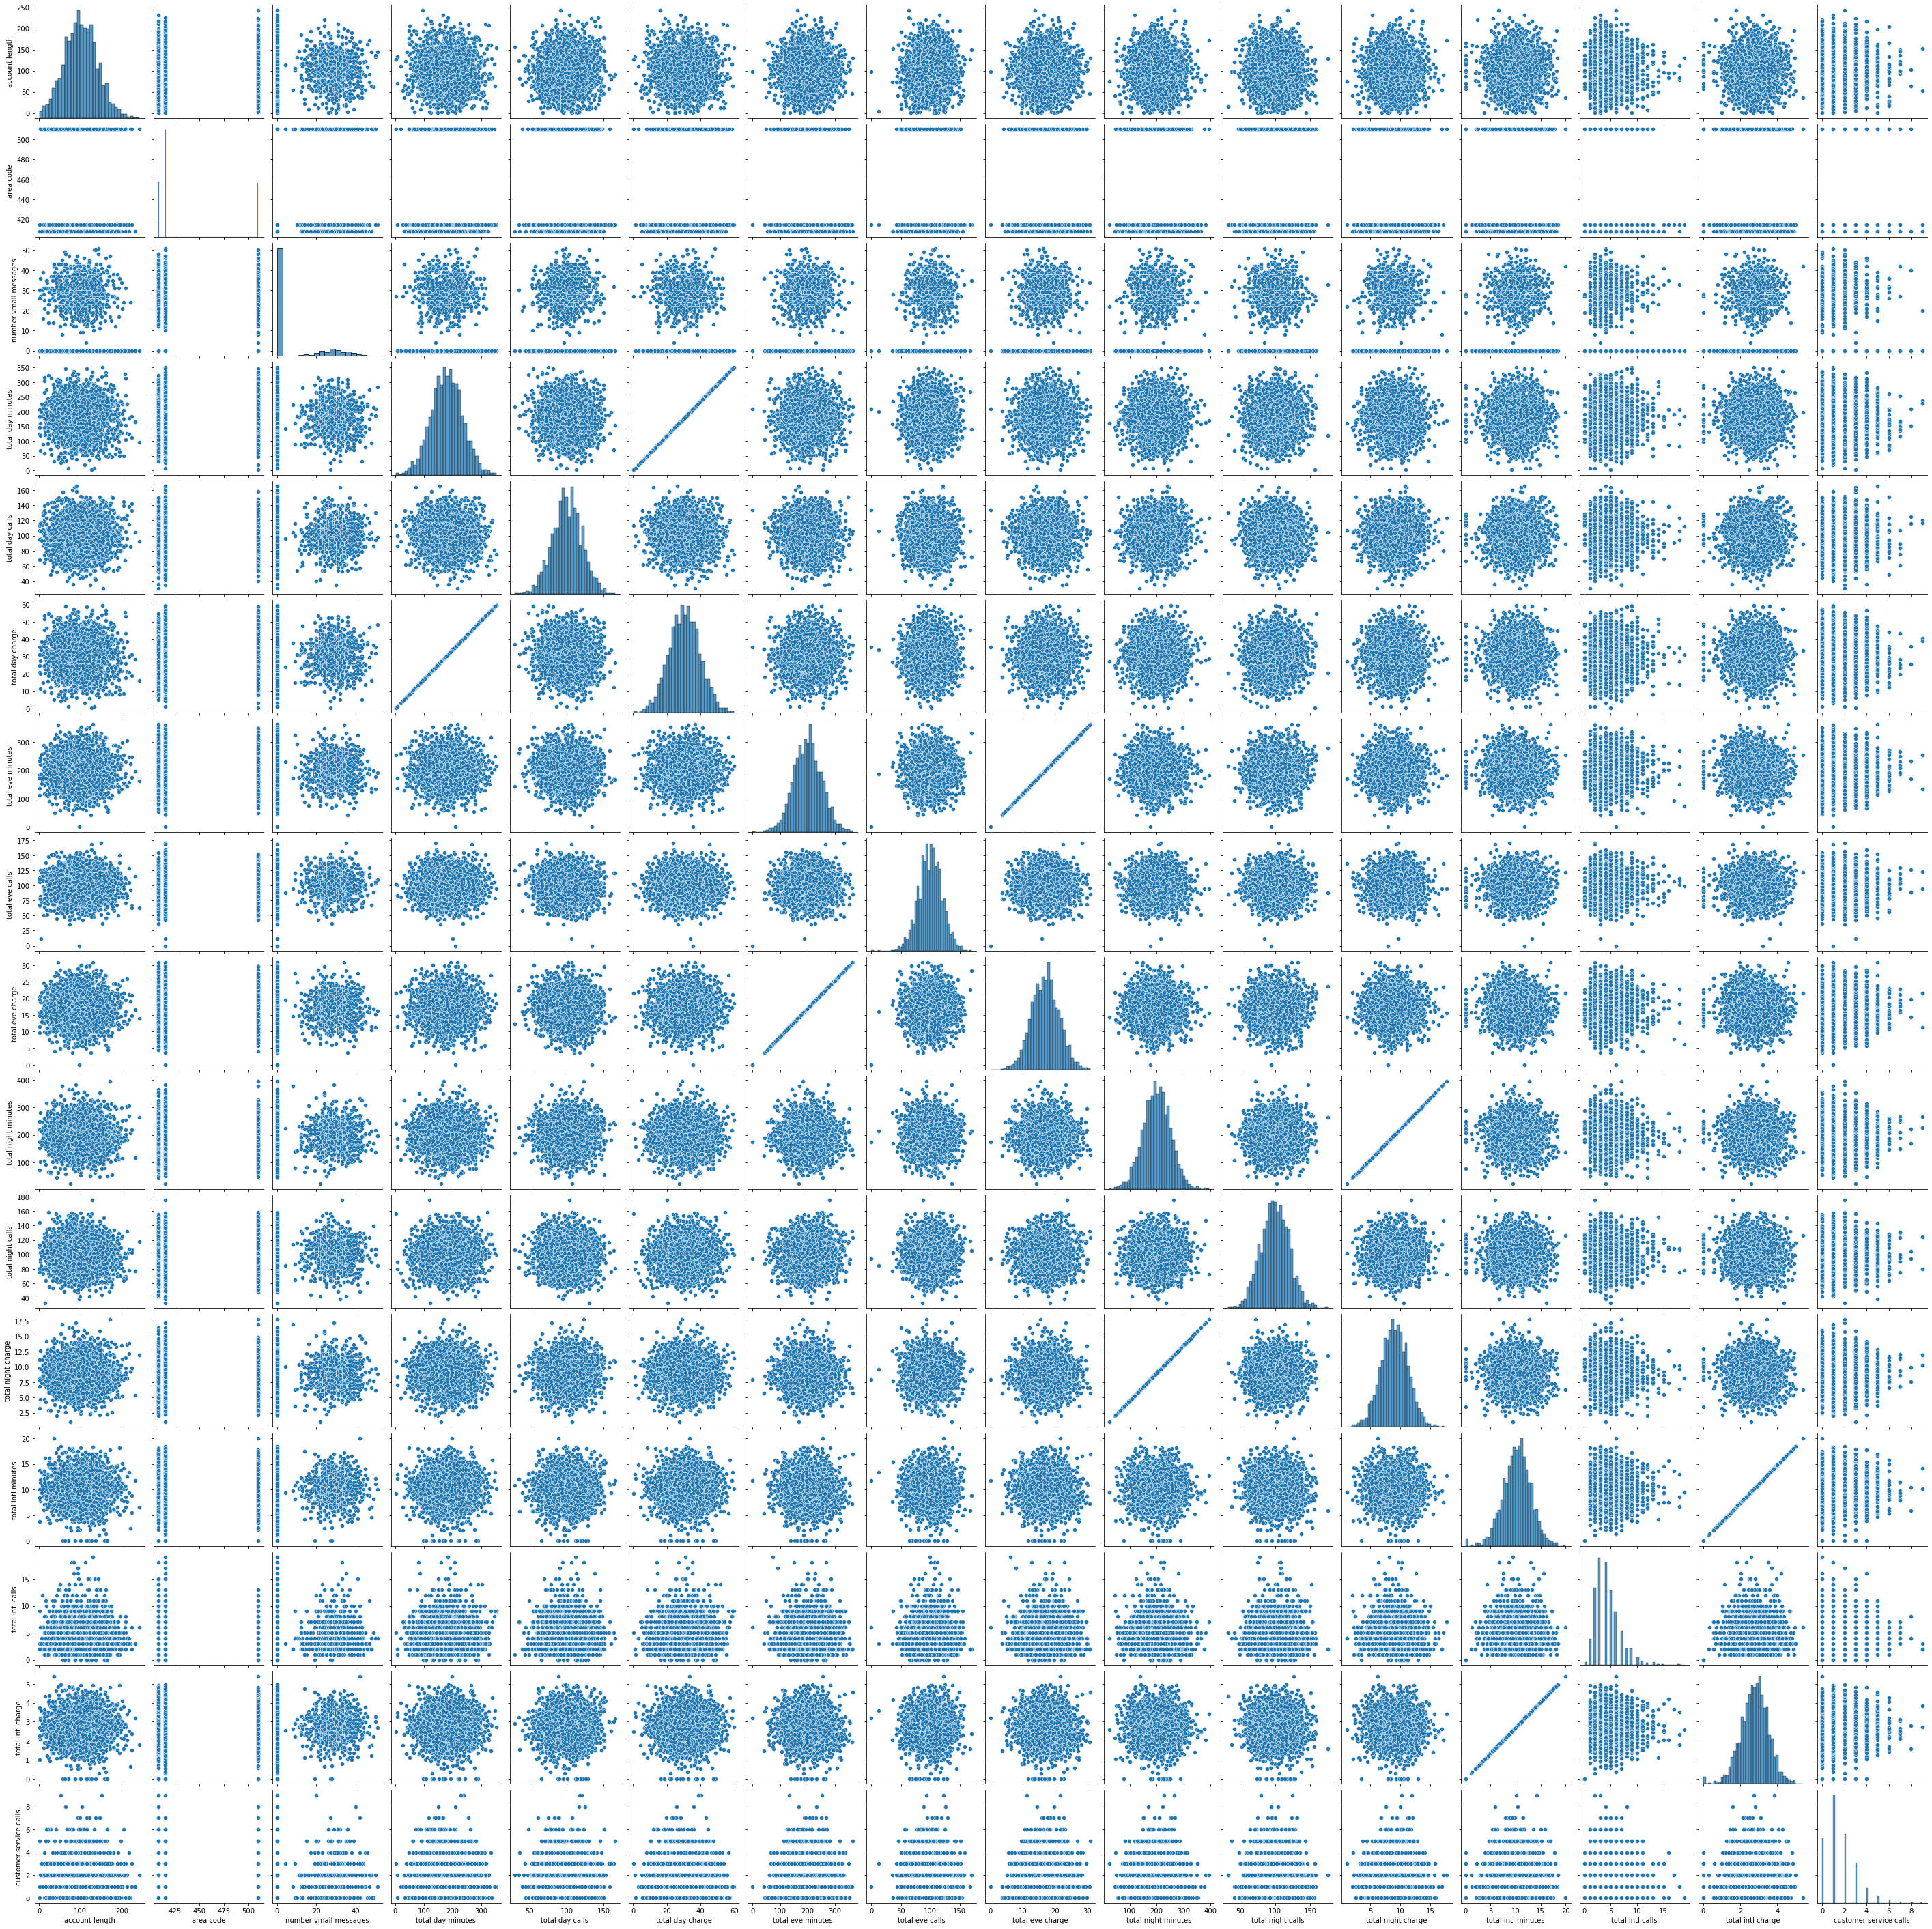

In [10]:
#use seaborn pairplot
sns.pairplot(X_train)
plt.show()


## Pairplot Analysis

It is not easy to see the names, but all the charges and total minutes columns are basically giving us the same data

total day minutes, total day charge      
total eve minutes, total eve charge      
total night minutes, total night charge      
total intl minutes, total intl charge

to be consisitent lets drop the minute columns 

area code can probably be considered a categorical variable we can look at that below.

customer service calls appears to be categorical but that column is telling us how many times a customer called.  This is better left as a continous variable.


## Dropping Columns from PairPlot

In [11]:
drop_cols = ['total day minutes','total eve minutes','total night minutes','total intl minutes']

X_train = X_train.drop(columns=drop_cols,axis=1)
X_train.head()

state  account length  area code international plan voice mail plan  \
817     UT             243        510                 no              no   
1373    SC             108        415                 no              no   
679     TX              75        415                yes              no   
56      CO             141        415                 no              no   
1993    IN              86        510                 no              no   

      number vmail messages  total day calls  total day charge  \
817                       0               92             16.24   
1373                      0              105             19.04   
679                       0               78             37.81   
56                        0               98             21.57   
1993                      0               96             36.77   

      total eve calls  total eve charge  total night calls  \
817                63             13.91                118   
1373              110             16.46                 93   
679               111             27.80                104   
56                 62             15.30                128   
1993               77             22.64                110   

      total night charge  total intl calls  total intl charge  \
817                11.89                 6               1.78   
1373                9.40                 4               1.11   
679                 9.36                 9               2.35   
56                  6.34                 2               2.16   
1993                9.63                 3               1.22   

      customer service calls  
817                        2  
1373                       4  
679                        1  
56                         1  
1993                       0

## Area Code
looking at the unique values in area code

In [12]:
X_train['area code'].unique()

array([510, 415, 408])

We can see that we have only 3 area codes in our database we will treat this as a categorical variable.

## Column Transformation
* OrdinalEncoder - 'state', 'area code'

* OneHotEncoder- 'international plan' voice mail plan

* StandardScaler - account length','total day calls',
              'total day charge','total eve calls',
              'total eve charge','total night calls',
              'total night charge','total intl calls',
              'total intl charge','customer service calls'


In [13]:
#take another look at X_train
X_train.head()

state  account length  area code international plan voice mail plan  \
817     UT             243        510                 no              no   
1373    SC             108        415                 no              no   
679     TX              75        415                yes              no   
56      CO             141        415                 no              no   
1993    IN              86        510                 no              no   

      number vmail messages  total day calls  total day charge  \
817                       0               92             16.24   
1373                      0              105             19.04   
679                       0               78             37.81   
56                        0               98             21.57   
1993                      0               96             36.77   

      total eve calls  total eve charge  total night calls  \
817                63             13.91                118   
1373              110             16.46                 93   
679               111             27.80                104   
56                 62             15.30                128   
1993               77             22.64                110   

      total night charge  total intl calls  total intl charge  \
817                11.89                 6               1.78   
1373                9.40                 4               1.11   
679                 9.36                 9               2.35   
56                  6.34                 2               2.16   
1993                9.63                 3               1.22   

      customer service calls  
817                        2  
1373                       4  
679                        1  
56                         1  
1993                       0

##  Column Transformation Logic
Below we will create a column transformer using sklearn.compose  ColumnTransformer()

This will make it easier for us to perform the same steps on the test data once we have our opitimized model.

The big concern of this step was keeping track of the column headings.  While ultimately the column headings will not affect the models prediction, they will definitely help prevent human errors during the development process.

The drawback of using columntransformes is that the columns will change order.  To handle this concern, I have added 3 lists below:
* encode_cols - OrdinalEncoder()
* one_hot_cols - OneHotEncoder()
* scale_cols - StandardScaler()

These lists will be used in the ColumnTransformer with their respected function.  Then they will be combined in the new_col_order list.  

In [14]:
#label encoder for cat data
encoder = OrdinalEncoder()
encode_cols = ['state','area code']

one_hot = OneHotEncoder(sparse='False',drop='first')
one_hot_cols = ['international plan','voice mail plan']

#standard scaler for numerical columns
scale_cols = ['account length','number vmail messages','total day calls',
              'total day charge','total eve calls',
              'total eve charge','total night calls',
              'total night charge','total intl calls',
              'total intl charge','customer service calls']

scaler = StandardScaler()

#keep track of column headings
new_col_order = encode_cols + one_hot_cols + scale_cols

#column transformer
ct = ColumnTransformer(transformers=[
    ('enc',encoder, encode_cols),
    ('ohe',one_hot, one_hot_cols),
    ('ss',scaler, scale_cols)],
    remainder='passthrough'
)



## Fit_Transform The Column Transformer
We will fit and transform our X_train.  This is where we use our new_col_order list to get our column titles in the correct location.  Also double check the shape.  It should match our value from above (2666,15)


In [15]:
#perform fit_transform
data=ct.fit_transform(X_train)
#put the DataFrame back together
X_train_trans = pd.DataFrame(data,columns=new_col_order,index=X_train.index)
#display the shape (2666,15)
X_train_trans.shape

(2666, 15)

In [16]:
X_train_trans.head()

state  area code  international plan  voice mail plan  account length  \
817    44.0        2.0                 0.0              0.0        3.601382   
1373   40.0        1.0                 0.0              0.0        0.184951   
679    43.0        1.0                 1.0              0.0       -0.650176   
56      5.0        1.0                 0.0              0.0        1.020079   
1993   15.0        2.0                 0.0              0.0       -0.371801   

      number vmail messages  total day calls  total day charge  \
817               -0.584936        -0.429657         -1.547170   
1373              -0.584936         0.224176         -1.244071   
679               -0.584936        -1.133785          0.787772   
56                -0.584936        -0.127888         -0.970200   
1993              -0.584936        -0.228477          0.675192   

      total eve calls  total eve charge  total night calls  \
817         -1.840891         -0.731087           0.925634   
1373         0.499864         -0.139179          -0.353704   
679          0.549667          2.493068           0.209205   
56          -1.890695         -0.408439           1.437368   
1993        -1.143645          1.295326           0.516246   

      total night charge  total intl calls  total intl charge  \
817             1.256197          0.634849          -1.304132   
1373            0.164841         -0.184370          -2.191525   
679             0.147309          1.863677          -0.549186   
56             -1.176344         -1.003589          -0.800835   
1993            0.265649         -0.593980          -2.045833   

      customer service calls  
817                 0.318978  
1373                1.813519  
679                -0.428293  
56                 -0.428293  
1993               -1.175564

# Baseline Model
Creating a dummy model that will just pick based on the dominant target class no churn.  This will serve as our baseline model.  This will predict No Churn every time.  Our model should have an accuracy score of 85%.  This is not great because we are not identifying the customers that are leaving(churn).  

In [17]:
## Dummy model
dummy_model = DummyClassifier(strategy='most_frequent')
#fit the model
dummy_model.fit(X_train_trans,y_train)
#check to see if the model is actually predicting all 0's - No Churn
dummy_model.predict(X_train_trans)[:30] #display first 30 -  see all zeros


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

## Cross Validation Baseline Model

In [18]:
cv_res = cross_val_score(dummy_model, X_train_trans, y_train, cv=5)
print('The mean from cv results is {}. \nThis should be around 85% based on our no churn percent'\
      .format(np.mean(cv_res)))

The mean from cv results is 0.8567145196084631. 
This should be around 85% based on our no churn percent


## Confusion Matrix Baseline Model


In [19]:
#get predictions from y_train
y_preds = dummy_model.predict(X_train_trans)
#print confusion matrix
confusion_matrix(y_train,y_preds)

array([[2284,    0],
       [ 382,    0]])

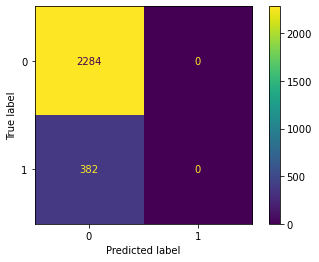

In [20]:
#plot confusion matrix
plot_confusion_matrix(dummy_model,X_train_trans,y_train)

## Score Baseline Model

Our accuracy at this point should match the 85% from our no churn.  We are just guessing that all customers are staying put.  

Recall, Precision and F1_Score will also be 0 because we are not guessing 
TP-True Positive, TN - True Negative, FN - False Negative, FP - False Positive

Recall - TP / TP + FN  -  This should result in 0 because we have no True Positives.

Precision - TP / TP + FP - This will give us a zero division error because we have 0 TP and 0 FP

F1 Score - Harmonic Mean between Recall an Precision -  This should also be 0

We will build these metrics into our Class Below

In [21]:
dummy_model.score(X_train_trans, y_train)

0.8567141785446362

In [22]:
#recall score  --  should be 0 we have 0 guesses for churn
dummy_recall = recall_score(y_train, y_preds)
dummy_recall

0.0

In [23]:
#precision score -- should be 0 we have 0 guesses for churn
dummy_precision = precision_score(y_train, y_preds, zero_division='warn')
dummy_precision

/Users/christopherflynn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [24]:
#f1 score -- should be 0 we have 0 guesses for churn
dummy_f1 = f1_score(y_train,y_preds)
dummy_f1

0.0

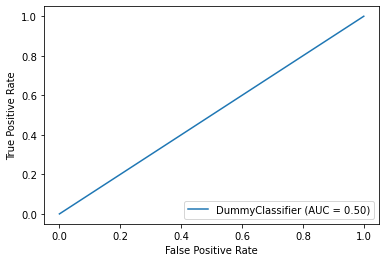

In [25]:
plot_roc_curve(dummy_model, X_train_trans, y_train)

## Model Testing Class

This model will help expediate the testing process of our models we will add the features tested above.

Model Summary will show warning on the Baseline Model because precison will have a zero_divison error.

In [26]:
class Model_test():
    
    '''
    This class will be used to quickly test and save models for comparison
    This class was modified from lecture: Classifican Workflow - Flatiron School - Greg Damico
    
    '''
    
    def __init__(self, mod_name, model, X, y, run_cv=True):
        self.name = mod_name
        self.model = model
        self.X = X
        self.y = y
        #cross validation
        self.cv_result = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        
        if run_cv:
            self.cross_val()
    
    def cross_val(self, X=None, y=None, kfolds=5):
        '''
        Perform cross validation on the model.
        '''
        #checks to see if user entered other values for X,y
        cv_X = X if X else self.X 
        cv_y = y if y else self.y
        
        self.cv_results = cross_val_score(self.model,cv_X,cv_y,cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_std = np.std(self.cv_results)
        self.cv_median = np.median(self.cv_results)
    
        
    
    def print_summary(self):
        res_mean = round(self.cv_mean,4)
        res_std = round(self.cv_std,4)
        print('CV Results for {}\n {} +- {} accuracy'.format(self.name,res_mean,res_std))
        
        #print precision, recall, f1
        y_preds = self.model.predict(self.X)
        prec = precision_score(self.y,y_preds,zero_division='warn')
        rec = recall_score(self.y,y_preds,zero_division='warn') 
        f1s = f1_score(self.y,y_preds,zero_division='warn')
        
        print('\n\nPrecision:{}\tRecall:{}\tF1_Score:{}'.format(prec,rec,f1s))
        
        #plot roc_curve
        print('\nROC CURVE')
        plot_roc_curve(self.model, self.X, self.y)
        plt.show()
        
        #plot confusion matrix
        print('\nCONFUSION MATRIX')
        plot_confusion_matrix(self.model,self.X, self.y,cmap='YlGnBu')
        plt.show()
        
        
        
        

## Baseline Results and Summary

Calling the class with our dummy_model and then printing the summary.  This process will let us know that our class is working properly and will be able to test all models in our iterative modeling process.

In [27]:
dummy_model_results = Model_test('Dummy',dummy_model, X_train_trans, y_train)

CV Results for Dummy
 0.8567 +- 0.0009 accuracy


Precision:0.0	Recall:0.0	F1_Score:0.0

ROC CURVE


/Users/christopherflynn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


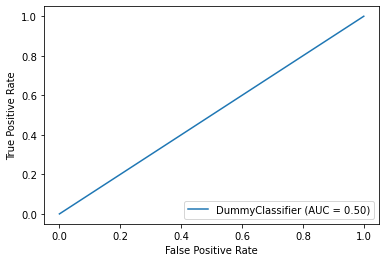


CONFUSION MATRIX


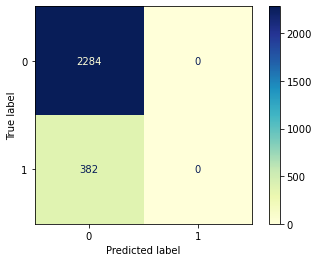

In [28]:
dummy_model_results.print_summary()

## SMOTE - Synthetic Minority Over-Sampling Technique
We will use SMOTE to give us some synthetic data points in our minority class.  Our minority class in this instance is customers that churn.  Our current breakdown in our X_test is 85% - No Churn 15% - Churn

SMOTE is from the imblearn.over_sampling

In [29]:
#Before smote
print('Before Smote\n', y_train.value_counts())
# create a smote
smote = SMOTE(random_state=42)
# fit and resample on X_train and y_train
X_train_resample, y_train_resample = smote.fit_resample(X_train_trans,y_train)

#after smote
print('\nAfter Smote\n', y_train_resample.value_counts())

Before Smote
 0    2284
1     382
Name: churn, dtype: int64

After Smote
 1    2284
0    2284
Name: churn, dtype: int64


Now we have 2284 Churns and 2284 No Churn

## Rerun Baseline Model

Our baseline Model should now have a 50% accuracy as we now have equally balanced classes.
Our other metrics should be the same as we are still only guessing No Churn.

CV Results for Dummy
 0.4998 +- 0.0003 accuracy


Precision:0.0	Recall:0.0	F1_Score:0.0

ROC CURVE


/Users/christopherflynn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


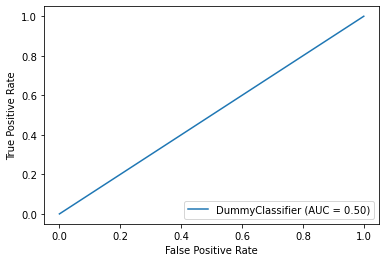


CONFUSION MATRIX


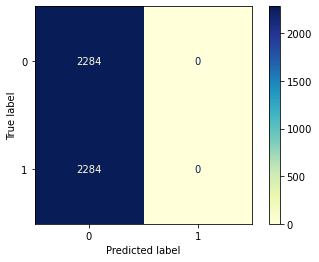

In [30]:
#rerunning baseline model
dummy_model_results = Model_test('Dummy',dummy_model, X_train_resample, y_train_resample)
dummy_model_results.print_summary()

We now have a better idea of the performance of our baseline model.  Moving forward we will be testing our models using the data in X_train_resample and y_train_resample.  


## Iterative Modeling
Now that we have a tool to evaluate our models we can begin our process of finding the best model.

We will start by comparing results from the following models

* LogisticRegression()
* DecisionTreeClassifier()
* RandomForestClassifier()

It will be benificial and time saving to build something to test a variety of models and find the best opitons

## Logistic Regression



CV Results for Logistic Regression
 0.78 +- 0.0208 accuracy


Precision:0.7782608695652173	Recall:0.7837127845884413	F1_Score:0.7809773123909249

ROC CURVE


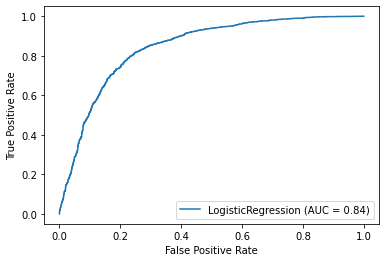


CONFUSION MATRIX


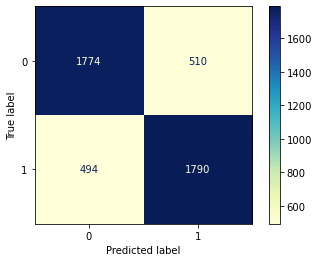

In [31]:
#simple Logistic Regression
log_reg = LogisticRegression(random_state=42,max_iter=1000)
log_reg.fit(X_train_resample,y_train_resample)
log_reg_result = Model_test('Logistic Regression',log_reg,X_train_resample, y_train_resample)
log_reg_result.print_summary()

## Logistic Regression with GridSearchCV
GridSearch will use parameter inputs to test multiple models and give us the best results


C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.[more](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

GridSearchCV is imported from sklearn.model_selection above



In [32]:
#parameter dictionary
params={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#set up gridsearchcv
gs = GridSearchCV(estimator=log_reg,param_grid=params,cv=10)

#fit the grid search
gs.fit(X_train_resample,y_train_resample)



GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [33]:
#get best score
gs.best_params_

{'C': 100}

In [34]:
gs.best_score_

0.7819681177780338

CV Results for Log_Reg Grid Search
 0.7813 +- 0.0215 accuracy


Precision:0.7782118055555556	Recall:0.7850262697022767	F1_Score:0.7816041848299914

ROC CURVE


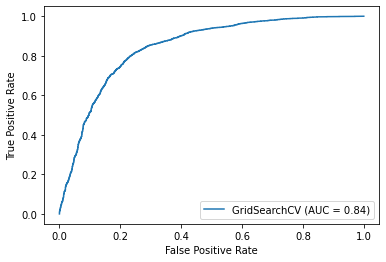


CONFUSION MATRIX


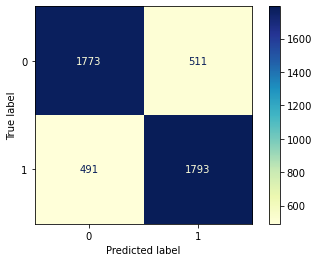

In [35]:
gs_results = Model_test('Log_Reg Grid Search', gs, X_train_resample,y_train_resample)
gs_results.print_summary()

This model is not performing better than the vanilla logisticRegression().  Lets try some other Classifiers

## Decision Tree
We will now try to fit a Decision Tree

DecisionTreeClassifier() was imported from sklearn.tree
we will use more parameters in our grid search

In [36]:
#set up the decision tree
dtc = DecisionTreeClassifier(random_state=42)
#Decision Tree parameters
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [None,3,4,5,6,7,8,10,20,50,100],
          'min_samples_split':[2,3,5,10]
}
#set up Grid Searth with DecisionTreeClassifier
gs = GridSearchCV(estimator=dtc,
                 param_grid=params,
                 cv=10)
#fit
gs.fit(X_train_resample,y_train_resample)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 4, 5, 6, 7, 8, 10, 20, 50, 100],
                         'min_samples_split': [2, 3, 5, 10]})

In [37]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

In [38]:
gs.best_score_

0.9236021536335368

CV Results for Grid Search Decision Tree
 0.9081 +- 0.0184 accuracy


Precision:0.9859154929577465	Recall:0.9500875656742557	F1_Score:0.9676700111482719

ROC CURVE


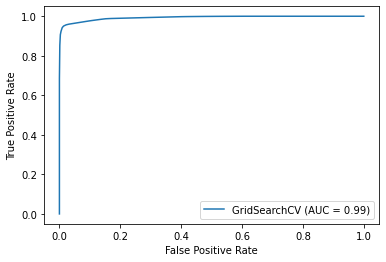


CONFUSION MATRIX


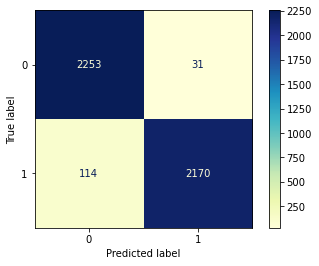

In [39]:
gs_results = Model_test('Grid Search Decision Tree',gs, X_train_resample,y_train_resample)
gs_results.print_summary()

Below we can see if we run the optimal parameters DecisionTreeClassifier() to see if we get the same results.

CV Results for Best Decision Tree
 0.9135 +- 0.0188 accuracy


Precision:0.9859154929577465	Recall:0.9500875656742557	F1_Score:0.9676700111482719

ROC CURVE


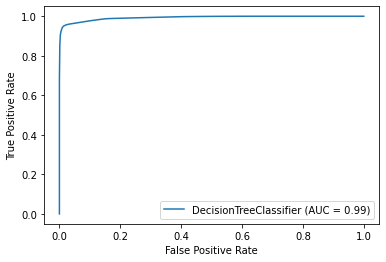


CONFUSION MATRIX


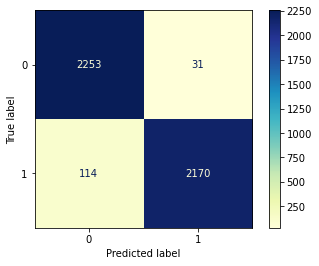

In [40]:
DTC_test = DecisionTreeClassifier(random_state=42, criterion='gini',max_depth=10,min_samples_split=2)
DTC_test.fit(X_train_resample,y_train_resample)
DTC_test_results=Model_test('Best Decision Tree', DTC_test, X_train_resample,y_train_resample)
DTC_test_results.print_summary()

This looks pretty good but DecisionTrees Are prone to overfitting the data.  Our False Negatives and False Positives are very low.

## RandomForestClassifier

Do to the high scores of the Decision Tree we will move on to RandomForestClassifier

this is imported from sklearn.ensemble

Random Forest Classifiers help with overfitting by creating many trees.  The ensemble of trees prevents the model from overfitting the training data.  Each tree will use different predictors.  We can limit overfitting by tuning the parameters.  

we will check the criterion like we did with the Decision Tree and we will use max_depth values around 10 because that is what worked in the DecisionTreeClassifier

min_samples_leaf will also be in the grid search.

CV Results for Grid Search Random Forest
 0.9475 +- 0.0221 accuracy


Precision:0.9991031390134529	Recall:0.9754816112084063	F1_Score:0.9871510855117412

ROC CURVE


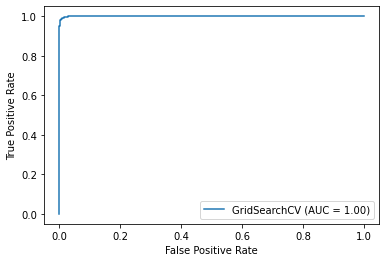


CONFUSION MATRIX


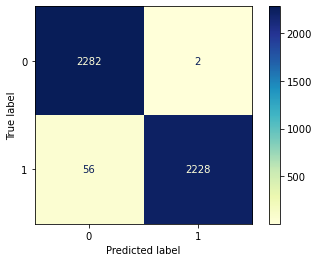

In [41]:
#parameters for RandomForestClassifier
params={'min_samples_leaf':[1,5,10],
       'criterion':['gini','entropy'],
        'max_depth':[7,10,13]}

#set up the RandomForest
rfc = RandomForestClassifier(random_state=42)

#create a GridSearchCV
gs=GridSearchCV(estimator=rfc,param_grid=params,cv=10)

#fit the GridSearchCV
gs.fit(X_train_resample,y_train_resample)

#put into our class Model_test and print summary
gs_results=Model_test('Grid Search Random Forest',gs,X_train_resample,y_train_resample)
gs_results.print_summary()

In [42]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1}

This would be a great result but the min_samples_leaf being set at 1 definitely means that this model is overfit. 
lets use our other optimal parameters and set min_samples_leaf to 5.

CV Results for Random Forest Optimal Parameters
 0.9381 +- 0.0175 accuracy


Precision:0.9923250564334086	Recall:0.9623467600700525	F1_Score:0.9771060235607913

ROC CURVE


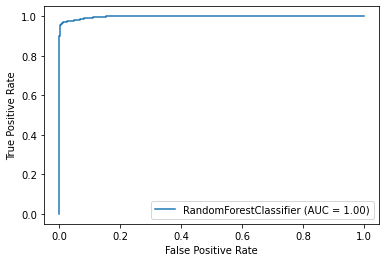


CONFUSION MATRIX


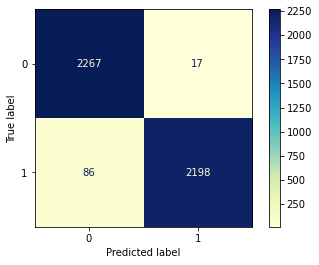

In [43]:
#Optimal Random Foretst
rfc_optimal=RandomForestClassifier(criterion='entropy', max_depth=13, min_samples_leaf=5, random_state=42)
#fit the model
rfc_optimal.fit(X_train_resample,y_train_resample)
#put the model into our class Model_test - print the summary
rfc_optimal_results = Model_test('Random Forest Optimal Parameters',rfc_optimal,X_train_resample,y_train_resample)
rfc_optimal_results.print_summary()

This probably helped a little bit with the overfitting.  lets make this our final model and start preparing our test data

## Prepare X_test data
We need to do the following to our validation set (X_test)

1. ColumnTransformer() - ct.transform()
2. Add the columns back for verification
3. rfc_optimal with X_test, y_test

In [44]:
#original X_test
X_test.head()


state  account length  area code international plan voice mail plan  \
438     WY             113        510                 no              no   
2674    IL              67        415                 no              no   
1345    SD              98        415                 no              no   
1957    KY             147        408                 no              no   
2148    WY              96        408                 no              no   

      number vmail messages  total day minutes  total day calls  \
438                       0              155.0               93   
2674                      0              109.1              117   
1345                      0                0.0                0   
1957                      0              212.8               79   
2148                      0              144.0              102   

      total day charge  total eve minutes  total eve calls  total eve charge  \
438              26.35              330.6              106             28.10   
2674             18.55              217.4              124             18.48   
1345              0.00              159.6              130             13.57   
1957             36.18              204.1               91             17.35   
2148             24.48              224.7               73             19.10   

      total night minutes  total night calls  total night charge  \
438                 189.4                123                8.52   
2674                188.4                141                8.48   
1345                167.1                 88                7.52   
1957                156.2                113                7.03   
2148                227.7                 91               10.25   

      total intl minutes  total intl calls  total intl charge  \
438                 13.5                 3               3.65   
2674                12.8                 6               3.46   
1345                 6.8                 1               1.84   
1957                10.2                 2               2.75   
2148                10.0                 7               2.70   

      customer service calls  
438                        1  
2674                       0  
1345                       4  
1957                       1  
2148                       1

In [45]:
import warnings
warnings.filterwarnings("ignore")
#apply column transformer to x_test transform only!!!
data = ct.transform(X_test)
X_test_trans = pd.DataFrame(data,columns=new_col_order,index=X_test.index)
X_test_trans.head()

state  area code  international plan  voice mail plan  account length  \
438    50.0        2.0                 0.0              0.0        0.311486   
2674   14.0        1.0                 0.0              0.0       -0.852632   
1345   41.0        1.0                 0.0              0.0       -0.068118   
1957   17.0        0.0                 0.0              0.0        1.171920   
2148   50.0        0.0                 0.0              0.0       -0.118732   

      number vmail messages  total day calls  total day charge  \
438               -0.584936        -0.379362         -0.452767   
2674              -0.584936         0.827714         -1.297113   
1345              -0.584936        -5.056782         -3.305141   
1957              -0.584936        -1.083490          0.611325   
2148              -0.584936         0.073292         -0.655194   

      total eve calls  total eve charge  total night calls  \
438          0.300651          2.562705           1.181501   
2674         1.197110          0.329704           2.102624   
1345         1.495930         -0.810008          -0.609571   
1957        -0.446399          0.067408           0.669766   
2148        -1.342858          0.473619          -0.456051   

      total night charge  total intl calls  total intl charge  \
438            -0.220859         -0.593980           1.172620   
2674           -0.238391          0.634849           0.920971   
1345           -0.659155         -1.413199          -1.224664   
1957           -0.873920         -1.003589          -0.019400   
2148            0.537392          1.044458          -0.085623   

      customer service calls  
438                -0.428293  
2674               -1.175564  
1345                1.813519  
1957               -0.428293  
2148               -0.428293

## Final Model on Test Data 
We will now put our final model to the the test on X_test_trans and y_test

rfc_optimal was our best model

CV Results for Random Forest - Final Model
 0.8816 +- 0.0295 accuracy


Precision:0.7941176470588235	Recall:0.801980198019802	F1_Score:0.7980295566502462

ROC CURVE


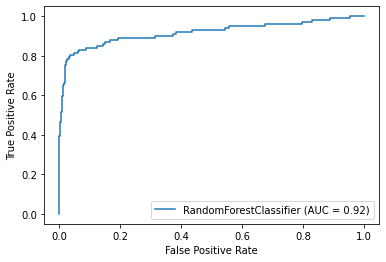


CONFUSION MATRIX


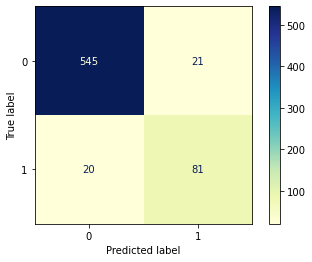

In [46]:
#final model on test data 

final_results = Model_test('Random Forest - Final Model', rfc_optimal, X_test_trans, y_test)
final_results.print_summary()

## Final Test Results
Our model was able to correctly identify 81 / 101 churns 
while only mislabeling 21 / 556 customers that did not leave